# Web Scraping for Indeed.com & Predicting Salaries

In this project, we will practice two major skills: collecting data by scraping a website and then building a binary classifier.

We are going to collect salary information on data science jobs in a variety of markets. Then using the location, title and summary of the job we will attempt to predict the salary of the job. For job posting sites, this would be extraordinarily useful. While most listings DO NOT come with salary information (as you will see in this exercise), being to able extrapolate or predict the expected salaries from other listings can help guide negotiations.

Normally, we could use regression for this task; however, we will convert this problem into classification and use a random forest regressor, as well as another classifier of your choice; either logistic regression, SVM, or KNN. 

- **Question**: Why would we want this to be a classification problem?
- **Answer**: While more precision may be better, there is a fair amount of natural variance in job salaries - predicting a range be may be useful.

Therefore, the first part of the assignment will be focused on scraping Indeed.com. In the second, we'll focus on using listings with salary information to build a model and predict additional salaries.

### Scraping job listings from Indeed.com

We will be scraping job listings from Indeed.com using BeautifulSoup. Luckily, Indeed.com is a simple text page where we can easily find relevant entries.

First, look at the source of an Indeed.com page: (http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10")

Notice, each job listing is underneath a `div` tag with a class name of `result`. We can use BeautifulSoup to extract those. 

#### Setup a request (using requests) to the URL below. Use BeautifulSoup to parse the page and extract all results (HINT: Look for div tags with class name result)
The URL here has many query parameters
- q for the job search
- This is followed by "+20,000" to return results with salaries (or expected salaries >$20,000)
- l for a location
- start for what result number to start on

In [2]:
URL = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=20"


In [3]:
import requests
import bs4
from bs4 import BeautifulSoup
import urllib

In [4]:
html = urllib.urlopen(URL).read()

indeed = BeautifulSoup(html, 'html.parser', from_encoding="utf-8")

In [26]:
URL2 = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=Chicago"

html2 = urllib.urlopen(URL2).read()

indeed2 = BeautifulSoup(html2, 'html.parser', from_encoding="utf-8")

In [153]:

URL3 = 'http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=Washington%2C+DC&start=0'

html3 = urllib.urlopen(URL3).read()

indeed3 = BeautifulSoup(html3, 'html.parser', from_encoding="utf-8")

In [43]:
import pandas as pd
#import pandas as pd
df = pd.DataFrame(columns=["title","location","company","salary"])

In [134]:
df4 = pd.DataFrame(columns=["title","location","company","salary"])

In [44]:
for entry in indeed2.find_all(name = 'div', attrs = {'class':' row result'}):
    location = entry.find(name='span',attrs = {'class':'location'}).text
    company = entry.find(name='span',attrs = {'class':'company'}).text
    title = entry.find(name='h2', attrs = {'class':'jobtitle'}).text
    try:
        salary = entry.find(name='td', attrs = {'class':'snip'}).find('nobr').renderContents()
    except:
        salary = 'NA'
    #print entry
    df.loc[len(df)]=[title, location, company, salary]

In [94]:
for entry in indeed3.find_all(name = 'div', attrs = {'class':' row result'}):
    location = entry.find(name='span',attrs = {'class':'location'}).text
    company = entry.find(name='span',attrs = {'class':'company'}).text
    title = entry.find(name='h2', attrs = {'class':'jobtitle'}).text
    try:        
        salary = entry.find(name='td', attrs = {'class':'snip'}).find('nobr').renderContents()
    except:
        salary = 'NA'
    #print entry
    df.loc[len(df)]=[title, location, company, salary]
    

In [113]:
df2 = pd.DataFrame(columns=["title","location","company","salary"])

In [187]:
df2['title'] = df2.title.str.replace("\n","")

In [381]:
#defining a function to grab the elements from the scaper (british version). 
dfbritish = pd.DataFrame(columns=["title","location","company","salary"])

def find_all_british(soup_obj):
    for entry in soup_obj.find_all(name = 'div', attrs = {'class':' row result'}):
        try:
            location = entry.find(name='span',attrs = {'class':'location'}).text
        except: 
            location = 'NA'
        try:
            company = entry.find(name='span',attrs = {'class':'company'}).text
        except:
            company = 'NA'
        try:
            title = entry.find(name='h2', attrs = {'class':'jobtitle'}).text
        except:
            title = 'NA'
        try:
            salary = entry.find(name='td', attrs = {'class':'snip'}).find('nobr').renderContents()
        except:
            salary = 'NA'
        #add information to the data frame 
        dfbritish.loc[len(dfbritish)]=[title, location, company, salary]

In [152]:
#defining a function to grab the elements from the scaper. 
dfmedium = pd.DataFrame(columns=["title","location","company","salary"])

def find_all_medium(soup_obj):
    for entry in soup_obj.find_all(name = 'div', attrs = {'class':' row result'}):
        try:
            location = entry.find(name='span',attrs = {'class':'location'}).text
        except: 
            location = 'NA'
        try:
            company = entry.find(name='span',attrs = {'class':'company'}).text
        except:
            company = 'NA'
        try:
            title = entry.find(name='h2', attrs = {'class':'jobtitle'}).text
        except:
            title = 'NA'
        try:
            salary = entry.find(name='td', attrs = {'class':'snip'}).find('nobr').renderContents()
        except:
            salary = 'NA'
        #add information to the data frame 
        dfmedium.loc[len(dfmedium)]=[title, location, company, salary]

Let's look at one result more closely. A single result looks like
```JSON
<div class=" row result" data-jk="2480d203f7e97210" data-tn-component="organicJob" id="p_2480d203f7e97210" itemscope="" itemtype="http://schema.org/JobPosting">
<h2 class="jobtitle" id="jl_2480d203f7e97210">
<a class="turnstileLink" data-tn-element="jobTitle" onmousedown="return rclk(this,jobmap[0],1);" rel="nofollow" target="_blank" title="AVP/Quantitative Analyst">AVP/Quantitative Analyst</a>
</h2>
<span class="company" itemprop="hiringOrganization" itemtype="http://schema.org/Organization">
<span itemprop="name">
<a href="/cmp/Alliancebernstein?from=SERP&campaignid=serp-linkcompanyname&fromjk=2480d203f7e97210&jcid=b374f2a780e04789" target="_blank">
    AllianceBernstein</a></span>
</span>
<tr>
<td class="snip">
<nobr>$117,500 - $127,500 a year</nobr>
<div>
<span class="summary" itemprop="description">
C onduct quantitative and statistical research as well as portfolio management for various investment portfolios. Collaborate with Quantitative Analysts and</span>
</div>
</div>
</td>
</tr>
</table>
</div>
```

While this has some more verbose elements removed, we can see that there is some structure to the above:
- The salary is available in a nobr element inside of a td element with class='snip.
- The title of a job is in a link with class set to jobtitle and a data-tn-element="jobTitle.
- The location is set in a span with class='location'.
- The company is set in a span with class='company'.

## Write 4 functions to extract each item: location, company, job, and salary.¶
Example
```python
def extract_location_from_result(result):
    return result.find ...
```

##### - Make sure these functions are robust and can handle cases where the data/field may not be available.
>- Remember to check if a field is empty or None for attempting to call methods on it
>- Remember to use try/except if you anticipate errors.

- **Test** the functions on the results above and simple examples

Now, to scale up our scraping, we need to accumulate more results. We can do this by examining the URL above.
- "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l=New+York&start=10"

There are two query parameters here we can alter to collect more results, the l=New+York and the start=10. The first controls the location of the results (so we can try a different city). The second controls where in the results to start and gives 10 results (thus, we can keep incrementing by 10 to go further in the list).
##### Complete the following code to collect results from multiple cities and starting points.
- Enter your city below to add it to the search
- Remember to convert your salary to U.S. Dollars to match the other cities if the currency is different

In [376]:
#large cities 

max_results_per_city = 2000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

large_results = []

for city in set(['New+York', 'Chicago', 'San+Francisco', 'Austin', 'Seattle', 
    'Los+Angeles']):
    url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l="+city+"&start="
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        result = url_template+str(start)
        # Append to the full set of results
        large_results.append(result)
        pass

In [379]:
max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

british_results = []

for city in set(['London','Birmingham','Manchester','Glasgow']):
    url_template = "http://www.indeed.co.uk/jobs?q=data+scientist+%2420%2C000&l="+city+"&start="
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        result = url_template+str(start)
        # Append to the full set of results
        british_results.append(result)
        pass

In [155]:
#medium sized cities 

max_results_per_city = 1000 # Set this to a high-value (5000) to generate more results. 
# Crawling more results, will also take much longer. First test your code on a small number of results and then expand.

medium_results = []


for city in set(['Philadelphia', 'Atlanta', 'Dallas', 'Pittsburgh', 
    'Portland', 'Phoenix', 'Denver', 'Houston', 'Miami', 'Washington%2C+DC']):
    url_template = "http://www.indeed.com/jobs?q=data+scientist+%2420%2C000&l="+city+"&start="
    for start in range(0, max_results_per_city, 10):
        # Grab the results from the request (as above)
        result = url_template+str(start)
        # Append to the full set of results
        medium_results.append(result)
        pass


In [377]:
#large_scraper

for result in large_results:
    url = result 
    html = urllib.urlopen(url).read()
    b = BeautifulSoup(html, 'html.parser', from_encoding="utf-8")
    find_all_large(b)

In [386]:
#british Scraper
for result in british_results:
    url = result 
    html = urllib.urlopen(url).read()
    b = BeautifulSoup(html, 'html.parser', from_encoding="utf-8")
    find_all_british(b)

In [160]:
#medium_scraper

for result in medium_results:
    url = result 
    html = urllib.urlopen(url).read()
    b = BeautifulSoup(html, 'html.parser', from_encoding="utf-8")
    find_all_medium(b)

#### Use the functions you wrote above to parse out the 4 fields - location, title, company and salary. Create a dataframe from the results with those 4 columns.

Lastly, we need to clean up salary data. 

1. Only a small number of the scraped results have salary information - only these will be used for modeling.
1. Some of the salaries are not yearly but hourly or weekly, these will not be useful to us for now
1. Some of the entries may be duplicated
1. The salaries are given as text and usually with ranges.

#### Find the entries with annual salary entries, by filtering the entries without salaries or salaries that are not yearly (filter those that refer to hour or week). Also, remove duplicate entries

In [197]:
#defining a function to grab certain salaries  

def grab_salary(df):
    return df[df.salary.str.contains('year') | df.salary.str.contains('month')]
    

#defining a function to clean columns

def clean_company(df):
    df['company'] = df.company.str.replace("\n","")
    return df

def clean_title(df):
    df['title'] = df.title.str.replace("\n","")
    return df


def clean_location_text(column):
    head, sep, tail = column.partition(',')
    return head

def clean_location(df):
    df['location'] = df['location'].apply(clean_location_text)
    return df 

In [391]:
#cleaning df of large cities 

dflarge = grab_salary(dflarge)
clean_company(dflarge)
clean_title(dflarge)
clean_location(dflarge)

#dflarge.head()

In [393]:
#cleaning df of british cities 

dfbritish = grab_salary(dfbritish)
clean_company(dfbritish)
clean_title(dfbritish)
clean_location(dfbritish)

dfbritish.head()

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

,title,location,company,salary
1,Data Scientist / Modelling Insight Analyst,Birmingham,Blue Pelican,"£35,000 - £45,000 a year"
5,Data Scientist,Birmingham,Churchill Frank,"£30,000 - £40,000 a year"
7,Machine Learning Specialist,Coventry,Churchill Frank,"£30,000 - £40,000 a year"
10,Head of Data Analytics and Business Intelligen...,Halesowen,In touch games,"£80,000 - £100,000 a year"
11,Assay Development Scientist,Birmingham,Taylorollinson,"£25,000 - £35,000 a year"


In [304]:
dfmedium = grab_salary(dfmedium)
clean_company(dfmedium)
clean_title(dfmedium)
clean_location(dfmedium)
#dfmedium

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-c

,title,location,company,salary
10,"Scientist, Process Development",Houston,iBio CMO,"$80,000 a year"
11,Data Scientist,Houston,Digital People,"$100,000 - $110,000 a year"
22,Data Scientist,Houston,Rekruiters,"$150,000 a year"
40,Senior Research Policy Analyst,Houston,Baylor College of Medicine,"$67,000 a year"
56,C++ Software Engineer,Houston,Rekruiters,"$250,000 a year"
72,Sr. Bioinformatics Programmer,Houston,Baylor College of Medicine,"$70,000 - $91,000 a year"
81,Lead Bioinformatics Programmer,Houston,Baylor College of Medicine,"$90,000 a year"
86,Quantitative Risk Analyst,Houston,SearchAccountingJobs,"$150,000 - $205,000 a year"
460,Data Analyst/Scientist,Phoenix,CASH1,"$75,000 - $125,000 a year"
463,Data Architect,Phoenix,Career Evolutions,"$150,000 a year"


In [392]:
#dropping duplicates

dflarge = dflarge.drop_duplicates(keep='first')

In [394]:
dfbritish = dfbritish.drop_duplicates(keep='first')

In [305]:
dfmedium = dfmedium.drop_duplicates(keep='first')

In [269]:
## YOUR CODE HERE

def convert_salary(column):
    if '−' in column:
        head, sep, tail = column.partition('−')
        match = re.search(r'[\d,]+', head)
        if match:
            head = match.group()
            head = float(head.replace(',',''))
        match = re.search(r'[\d,]+', tail)
        if match:
            tail = match.group()
            tail = float(tail.replace(',',''))
        return (head + tail)/2
    else:
        match = re.search(r'[\d,]+', column)
        return float(match.group().replace(',',''))


In [395]:
def clean_salary(df):
    df['salary'] = df['salary'].apply(convert_salary)
    return df

def convert_month(column):
    if column <= 25000:
        return (column * 12)
    else:
        return column
    
def convert_month_brit(column):
    if column <= 15000:
        return (column * 12)
    else:
        return column
    
def apply_brit_conversion(df):
    df['salary'] = df['salary'].apply(convert_month_brit)
    return df

def apply_m_conversion(df):
    df['salary'] = df['salary'].apply(convert_month)
    return df 

In [396]:
#cleaning salary 

clean_salary(dflarge)
dflarge.head(2)

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,title,location,company,salary
10,Senior Quantitative Analyst,Chicago,Beall Research,60000.0
11,Data Scientist -Fitness/Wellness Firm,Chicago,Hirewell,120000.0


In [398]:
clean_salary(dfbritish)

In [400]:
apply_m_conversion(dflarge)
apply_brit_conversion(dfbritish)

In [402]:
#conversion rate of pound to dollar 
#dfbritish['salary'] = dfbritish['salary'] * 1.25

In [349]:
#applying conversion 
apply_m_conversion(dfmedium)

#### Write a function that takes a salary string and converts it to a number, averaging a salary range if necessary

### Save your results as a CSV

In [312]:
# Export to csv

dfmediumtest.to_csv('mediumcities_updated.csv', index=False)


## Predicting salaries using Random Forests + Another Classifier

#### Load in the the data of scraped salaries

In [409]:
## YOUR CODE HERE

medium2 = pd.read_csv('mediumcities_updated.csv')
#model

In [410]:
#combining dataframes 

data = pd.concat([medium2, dflarge, dfbritish])

#### We want to predict a binary variable - whether the salary was low or high. Compute the median salary and create a new binary variable that is true when the salary is high (above the median)

We could also perform Linear Regression (or any regression) to predict the salary value here. Instead, we are going to convert this into a _binary_ classification problem, by predicting two classes, HIGH vs LOW salary.

While performing regression may be better, performing classification may help remove some of the noise of the extreme salaries. We don't have to choice the `median` as the splitting point - we could also split on the 75th percentile or any other reasonable breaking point.

In fact, the ideal scenario may be to predict many levels of salaries, 

In [414]:
## YOUR CODE HERE

median = data.salary.median()
#77490

def median_col(column):
    if column <= median:
        return 'low'
    else:
        return 'high'

In [416]:
data['salary_binary'] = data['salary'].apply(median_col)
#model

#### Thought experiment: What is the baseline accuracy for this model?

## YOUR CODE HERE

basline accuracy for this model should be 50% - as a random guesser should be able to classify half of the salaries correctly 

#### Create a Random Forest model to predict High/Low salary using statsmodel. Start by ONLY using the location as a feature. 

In [417]:
## YOUR CODE HERE

#X = model[model.drop('acceptability', axis =1)]
X = pd.get_dummies(data['location'])
y = data['salary_binary']

In [339]:
from sklearn.cross_validation import cross_val_score, StratifiedKFold, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [418]:
#instatiating a model 

from sklearn.ensemble import RandomForestClassifier

rf_loc = RandomForestClassifier()

rf_loc.fit(X,y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [419]:
cv = StratifiedKFold(y, n_folds=5, shuffle=True)

In [420]:
y_pred = rf_loc.predict(X)
scores = cross_val_score(rf_loc, X, y, cv=cv)
scores.mean()

0.65711725550435218

In [421]:
conmat_1 = confusion_matrix(y, y_pred, labels=rf_loc.classes_)
conmat_1 = pd.DataFrame(conmat_1, columns=rf_loc.classes_, index=rf_loc.classes_)
print(conmat_1)

      high  low
high   183  129
low     38  274


#### Create a few new variables in your dataframe to represent interesting features of a job title.
- For example, create a feature that represents whether 'Senior' is in the title 
- or whether 'Manager' is in the title. 
- Then build a new Random Forest with these features. Do they add any value? 


In [423]:
data['Manager'] = data['title'].str.contains('Manager')

In [424]:
data['Senior'] = data['title'].str.contains('Senior')

In [348]:
#medium.title.str.contains('Manager')

In [359]:
#medium['Manager'] = medium['title'].apply(manager)

In [427]:
data.head(1)

,title,location,company,salary,salary_binary,Manager,Senior,salary_num
0,"Scientist, Process Development",Houston,iBio CMO,80000.0,high,False,False,1


In [425]:
salary_dict = {'high':1,'low':0}
data['salary_num'] = data['salary_binary'].apply(lambda x: salary_dict[x])

In [461]:
data.head(1)

,title,location,company,salary,salary_binary,Manager_x,Senior_x,salary_num,data_scientist_x,Manager_y,...,location_Warrington,location_Warwick,location_Warwick CV34,location_Washington,location_West Chester,location_West London,location_Westminster,ypred,ypredreg,reg_residuals
0,"Scientist, Process Development",Houston,iBio CMO,80000.0,high,False,False,1,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,111933.333333,111933.333333,-31933.333333


In [463]:
#logistic regression with stats models 

import statsmodels.formula.api as sm

smlogit1 = sm.logit("salary_num ~ Manager_x + Senior_x + data_scientist_x", data=data).fit()
smlogit1.summary()

Optimization terminated successfully.
         Current function value: 0.683927
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             salary_num   No. Observations:                  678
Model:                          Logit   Df Residuals:                      674
Method:                           MLE   Df Model:                            3
Date:                Fri, 06 Jan 2017   Pseudo R-squ.:                 0.01328
Time:                        09:24:42   Log-Likelihood:                -463.70
converged:                       True   LL-Null:                       -469.94
                                        LLR p-value:                  0.005910
============================================================================================
                               coef    std err          z      P>|z|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------------
Intercept                   -0.2016      0.103     -1.954      0.051        -0.404     0.001
Manager_x[T.True]            0.0982      0.357      0.275      0.784        -0.602     0.799
Senior_x[T.True]             0.6213      0.237      2.618      0.009         0.156     1.086
data_scientist_x[T.True]     0.3736      0.164      2.273      0.023         0.051     0.696
============================================================================================
"""

In [467]:
e**.0982

#so if manager is in the title it is about ~10% more likely to be above the median salary

1.1031833268560338

In [465]:
e = 2.71828

e**.357

#so if scientist is in the title it is about ~43% more likely to be above the median salary

1.4290355266895025

In [466]:
e**.6213

#if 'senior' is in the title it is about ~86% more likely to be above the median salary

1.8613454418837991

In [428]:
#logistic regression with stats models 

import statsmodels.formula.api as sm

smlogit1 = sm.logit("salary_num ~ Manager + Senior", data=data).fit()
smlogit1.summary()

Optimization terminated successfully.
         Current function value: 0.686778
         Iterations 4


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:             salary_num   No. Observations:                  624
Model:                          Logit   Df Residuals:                      621
Method:                           MLE   Df Model:                            2
Date:                Fri, 06 Jan 2017   Pseudo R-squ.:                0.009189
Time:                        08:29:41   Log-Likelihood:                -428.55
converged:                       True   LL-Null:                       -432.52
                                        LLR p-value:                   0.01879
===================================================================================
                      coef    std err          z      P>|z|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept          -0.0928      0.088     -1.055      0.291        -0.265     0.080
Manager[T.True]     0.1566      0.365      0.428      0.668        -0.560     0.873
Senior[T.True]      0.6866      0.250      2.741      0.006         0.196     1.177
===================================================================================
"""

#### Rebuild this model with scikit-learn.
- You can either create the dummy features manually or use the `dmatrix` function from `patsy`
- Remember to scale the feature variables as well!


In [429]:
#looking to see if scientish helps 

data['data_scientist'] = data['title'].str.contains('Scientist')


In [430]:
data.head(1)

,title,location,company,salary,salary_binary,Manager,Senior,salary_num,data_scientist
0,"Scientist, Process Development",Houston,iBio CMO,80000.0,high,False,False,1,True


In [437]:
data.head(1)

,title,location,company,salary,salary_binary,Manager_x,Senior_x,salary_num,data_scientist_x,Manager_y,...,location_Swedesboro,location_Teddington,location_Tempe,location_Warrington,location_Warwick,location_Warwick CV34,location_Washington,location_West Chester,location_West London,location_Westminster
0,"Scientist, Process Development",Houston,iBio CMO,80000.0,high,False,False,1,True,False,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [442]:
#great score! 

X2 = data.drop(['salary_binary','location','company','salary','salary','title'], axis = 1)
y2 = data['salary_binary']

rf2 = RandomForestClassifier()

rf2.fit(X2,y2)

y_pred2 = rf2.predict(X2)
scores2 = cross_val_score(rf2, X2, y2, cv=cv)
scores2.mean()



0.99516129032258061

In [443]:
## YOUR CODE HERE

In [435]:
dummies = pd.get_dummies(data[['location','Manager','Senior','data_scientist']], drop_first = True)
data = data.merge(dummies, left_index = True, right_index = True,how = 'outer')

In [ ]:
#doing very well below....probably a little too well 

In [444]:
conmat_2 = confusion_matrix(y2, y_pred2, labels=rf2.classes_)
conmat_2 = pd.DataFrame(conmat_2, columns=rf2.classes_, index=rf2.classes_)
print(conmat_2)

      high  low
high   341    0
low      0  337


#### Use cross-validation in scikit-learn to evaluate the model above. 
- Evaluate the accuracy of the model. 

#### Random Forest Regressor

Let's try treating this as a regression problem. 

- Train a random forest regressor on the regression problem and predict your dependent.
- Evaluate the score with a 5-fold cross-validation
- Do a scatter plot of the predicted vs actual scores for each of the 5 folds, do they match?

In [446]:
Xreg = data.drop(['salary_binary','location','company','salary','salary','title'], axis = 1)
yreg = data['salary']

In [447]:
## YOUR CODE HERE

from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

rfr.fit(Xreg,yreg)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [448]:
y_pred_reg = rfr.predict(Xreg)
scoresreg = cross_val_score(rfr, Xreg, yreg, cv=cv)
scoresreg

array([ 0.54305262,  0.6716066 ,  0.50188886,  0.4738468 ,  0.49695557])

In [457]:
data['ypredreg'] = y_pred_reg

data['reg_residuals'] = data['salary'] - data['ypredreg']


In [455]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt


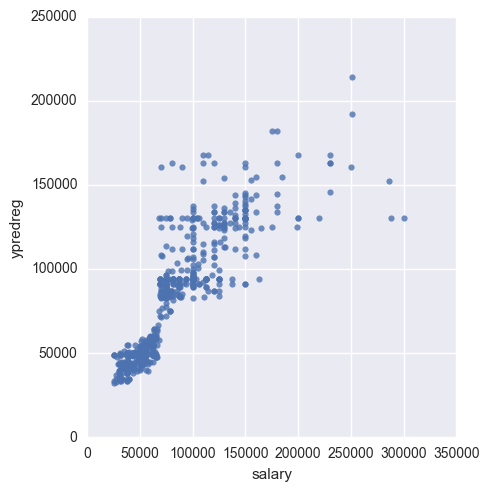

In [456]:
sns.lmplot(x = 'salary', y='ypredreg', fit_reg = False, data = data)
plt.show()

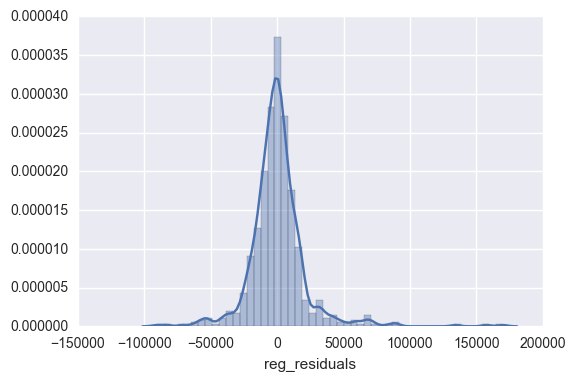

In [459]:
sns.distplot(data['reg_residuals'])
plt.show()

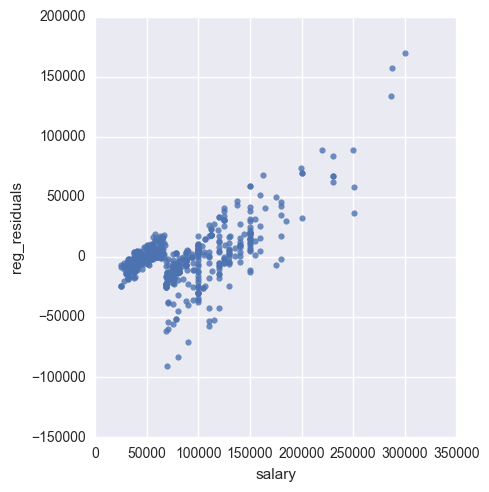

In [468]:
sns.lmplot(x = 'salary', y='reg_residuals', fit_reg = False, data = data)
plt.show()

#### Continue to incorporate other text features from the title or summary that you believe will predict the salary and examine their coefficients

#### Take ~100 scraped entries with salaries. Convert them to use with your model and predict the salary - which entries have the highest predicted salaries?

### BONUS 

#### Bonus: Use Count Vectorizer from scikit-learn to create features from the text summaries. 
- Examine using count or binary features in the model
- Re-evaluate your models using these. Does this improve the model performance? 
- What text features are the most valuable? 

In [23]:
## YOUR CODE HERE

In [24]:
## YOUR CODE HERE